In [1]:
import pyspark
print(pyspark.__version__)


3.5.3


In [3]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName("TestPySpark").getOrCreate()

# Test DataFrame Creation
df = spark.createDataFrame([("Pallav", 1), ("Achal", 2)], ["Name", "Value"])

# Show the DataFrame
df.show()

# Set logging level to "ERROR" to suppress warnings
spark.sparkContext.setLogLevel("ERROR")



+------+-----+
|  Name|Value|
+------+-----+
|Pallav|    1|
| Achal|    2|
+------+-----+



In [2]:
# Initialize Spark Session (if not already initialized)
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("AmazonApparel").getOrCreate()

# Load the dataset (replace 'path_to_dataset' with the actual file path)
df = spark.read.option("header", "true").option("sep", "\t").csv("/Users/pallavmahajan/Downloads/DATA-228_Big_Data/Project/amazon_reviews_us_Apparel_v1_00.tsv")

# Show the first few rows of the dataset
df.show(5)

# Check the schema to see the data structure
#df.printSchema()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/09 14:04:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|marketplace|customer_id|     review_id|product_id|product_parent|       product_title|product_category|star_rating|helpful_votes|total_votes|vine|verified_purchase|     review_headline|         review_body|review_date|
+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|         US|   32158956|R1KKOXHNI8MSXU|B01KL6O72Y|      24485154|Easy Tool Stainle...|         Apparel|          4|            0|          0|   N|                Y|★ THESE REALLY DO...|These Really Do W...| 2013-01-14|
|         US|    2714559|R26SP2OPDK4HT7|B01ID3ZS5W|     363128556|V28 Women Cowl Ne...|         Apparel|          5|    

In [21]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, when, col, desc

# Initialize Spark session
spark = SparkSession.builder.appName("AmazonApparelDatasetOverview").getOrCreate()

# Load the dataset
df = spark.read.option("header", "true").option("sep", "\t").option("encoding", "ISO-8859-1").csv("/Users/pallavmahajan/Downloads/DATA-228_Big_Data/Project/amazon_reviews_us_Apparel_v1_00.tsv")

# Show first few rows to give a glimpse of the data
df.show(5)


+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|marketplace|customer_id|     review_id|product_id|product_parent|       product_title|product_category|star_rating|helpful_votes|total_votes|vine|verified_purchase|     review_headline|         review_body|review_date|
+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|         US|   32158956|R1KKOXHNI8MSXU|B01KL6O72Y|      24485154|Easy Tool Stainle...|         Apparel|          4|            0|          0|   N|                Y|â THESE REALLY ...|These Really Do W...| 2013-01-14|
|         US|    2714559|R26SP2OPDK4HT7|B01ID3ZS5W|     363128556|V28 Women Cowl Ne...|         Apparel|          5|    

In [22]:
# Display the schema of the dataset
print("Dataset Schema:")
df.printSchema()

Dataset Schema:
root
 |-- marketplace: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- star_rating: string (nullable = true)
 |-- helpful_votes: string (nullable = true)
 |-- total_votes: string (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: string (nullable = true)



In [23]:
# Count missing values for each column
print("Missing Data Count per Column:")
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()
# Set logging level to "ERROR" to suppress warnings
spark.sparkContext.setLogLevel("ERROR")

Missing Data Count per Column:


+-----------+-----------+---------+----------+--------------+-------------+----------------+-----------+-------------+-----------+----+-----------------+---------------+-----------+-----------+
|marketplace|customer_id|review_id|product_id|product_parent|product_title|product_category|star_rating|helpful_votes|total_votes|vine|verified_purchase|review_headline|review_body|review_date|
+-----------+-----------+---------+----------+--------------+-------------+----------------+-----------+-------------+-----------+----+-----------------+---------------+-----------+-----------+
|          0|          0|        0|         0|             0|            0|              11|         11|           11|         11|  11|               11|             12|       1060|        287|
+-----------+-----------+---------+----------+--------------+-------------+----------------+-----------+-------------+-----------+----+-----------------+---------------+-----------+-----------+



In [24]:
# Display summary statistics for numeric columns
print("Summary Statistics for Numeric Columns:")
df.describe(["star_rating", "helpful_votes", "total_votes"]).show()

Summary Statistics for Numeric Columns:


+-------+------------------+------------------+------------------+
|summary|       star_rating|     helpful_votes|       total_votes|
+-------+------------------+------------------+------------------+
|  count|           5906322|           5906322|           5906322|
|   mean| 4.105228939431342|0.9742042509704009|1.1658421264536543|
| stddev|1.2592781632688692|20.684294045891537| 21.22267820577198|
|    min|                 1|                 0|                 0|
|    max|                 5|               996|               993|
+-------+------------------+------------------+------------------+



In [25]:
# Group by star_rating to show the distribution
print("Star Rating Distribution:")
df.groupBy("star_rating").count().orderBy("star_rating").show()

Star Rating Distribution:


+-----------+-------+
|star_rating|  count|
+-----------+-------+
|       NULL|     11|
|          1| 445456|
|          2| 369601|
|          3| 623471|
|          4|1147237|
|          5|3320557|
+-----------+-------+



In [26]:
# Top 10 most reviewed products along with their names
print("Top 10 Most Reviewed Products with Titles:")
df.groupBy("product_id", "product_title").count().orderBy(desc("count")).show(10, truncate=False)

Top 10 Most Reviewed Products with Titles:


+----------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|product_id|product_title                                                                                                                                                            |count|
+----------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|B004M6XUI2|RFID Blocking Men's Leather Classic Bifold Wallet Black - Stops Electronic Pick Pocketing, Works Against Identity Theft & Credit Card Data Breach by Stopping RFID Scans.|1834 |
|B004M6UDF0|Alpine Swiss Mens Wallet Leather Money Clip Thin Slim Front Pocket Wallet                                                                                                |1762 |
|B006PGGJOE|SHARKKÂ® Aluminum Wallet Credit Card Holder

In [28]:
# Distribution of verified purchases
print("Verified vs. Non-Verified Purchases:")
df.groupBy("verified_purchase").count().show()

Verified vs. Non-Verified Purchases:


+-----------------+-------+
|verified_purchase|  count|
+-----------------+-------+
|                Y|5312774|
|                N| 593548|
|             NULL|     11|
+-----------------+-------+



In [29]:
# Group by product_category to show the distribution of categories
print("Product Category Distribution:")
df.groupBy("product_category").count().orderBy(desc("count")).show(10)

Product Category Distribution:


+----------------+-------+
|product_category|  count|
+----------------+-------+
|         Apparel|5906322|
|            NULL|     11|
+----------------+-------+



In [30]:
# Add a column for review text length
df = df.withColumn("review_length", col("review_body").isNotNull().cast("int"))

# Show the average length of the reviews
print("Average Review Length:")
df.agg({"review_length": "avg"}).show()

Average Review Length:


+------------------+
|avg(review_length)|
+------------------+
|0.9998205316225821|
+------------------+



In [31]:
# Display the distinct product categories and their count
print("Product Categories and Their Count in the Dataset:")
df.groupBy("product_category").count().orderBy(desc("count")).show(truncate=False)

Product Categories and Their Count in the Dataset:


+----------------+-------+
|product_category|count  |
+----------------+-------+
|Apparel         |5906322|
|NULL            |11     |
+----------------+-------+



In [32]:
# Show a sample product title for each product category
print("Sample Products from Each Category:")
df.groupBy("product_category", "product_title").count().orderBy(desc("product_category")).show(truncate=False)

Sample Products from Each Category:


+----------------+-----------------------------------------------------------------------------------+-----+
|product_category|product_title                                                                      |count|
+----------------+-----------------------------------------------------------------------------------+-----+
|Apparel         |Women's Two-Piece Sleeveless Crop Top Bodycon Jumpsuit Romper Clubwear             |1    |
|Apparel         |Silver Lilly Unisex Adult Pajamas - Plush One Piece Cosplay Kangaroo Animal Costume|1    |
|Apparel         |KMystic Women's Lace Trim Chemise Nightgown                                        |1    |
|Apparel         |Tshirt Rocket She Loves Big Sacks and that Carolina D Panthers Shirt (Medium)      |1    |
|Apparel         |Hot Ass Tees Adult Novelty Donald Trump Presidency T-shirt                         |1    |
|Apparel         |Hanes Women's Cottony Boyfriend Wirefree                                           |13   |
|Apparel         |S

In [33]:
from pyspark.sql.functions import when

# Add a new column 'demographic_group' based on keywords in 'product_title'
df = df.withColumn("demographic_group", 
    when(df.product_title.rlike("(?i)(men|male|boy)"), "Men")
    .when(df.product_title.rlike("(?i)(women|female|girl)"), "Women")
    .when(df.product_title.rlike("(?i)(kid|child|children)"), "Children")
    .otherwise("Uncategorized"))

# Show the first few rows to check the new column
df.select("product_title", "demographic_group").show(10, truncate=False)


+------------------------------------------------------------------------------------+-----------------+
|product_title                                                                       |demographic_group|
+------------------------------------------------------------------------------------+-----------------+
|Easy Tool Stainless Steel Fruit Pineapple Corer Slicer Peeler Cut (One size, sliver)|Uncategorized    |
|V28 Women Cowl Neck Knit Stretchable Elasticity Long Sleeve Slim Fit Sweater Dress  |Men              |
|James Fiallo Men's 12-Pairs Low Cut Athletic Sport Socks                            |Men              |
|Belfry Gangster 100% Wool Stain-Resistant Crushable Dress Fedora in 4 Colors        |Uncategorized    |
|JAEDEN Women's Beaded Spaghetti Straps Sexy Long Formal Prom Evening Dresses        |Men              |
|Levi's Boys' 514 Straight Fit Jeans                                                 |Men              |
|Minimalist Wallet & Credit Card Holder Men with Slim D

In [36]:
# Add a new column 'apparel_section' based on keywords in 'product_title'
df = df.withColumn("apparel_section", 
    when(df.product_title.rlike("(?i)(shirt|t-shirt|jacket|coat|sweater)"), "Shirts/Outerwear")
    .when(df.product_title.rlike("(?i)(pants|jeans|shorts|leggings)"), "Pants/Bottoms")
    .when(df.product_title.rlike("(?i)(shoes|boots|sandals|sneakers)"), "Footwear")
    .when(df.product_title.rlike("(?i)(hat|belt|scarf|gloves|watch)"), "Accessories")
    .otherwise("Other"))

# Show the first few rows to check the new columns for demographic and apparel section
df.select("product_title", "demographic_group", "apparel_section").show(10, truncate=False)


+------------------------------------------------------------------------------------+-----------------+----------------+
|product_title                                                                       |demographic_group|apparel_section |
+------------------------------------------------------------------------------------+-----------------+----------------+
|Easy Tool Stainless Steel Fruit Pineapple Corer Slicer Peeler Cut (One size, sliver)|Uncategorized    |Other           |
|V28 Women Cowl Neck Knit Stretchable Elasticity Long Sleeve Slim Fit Sweater Dress  |Men              |Shirts/Outerwear|
|James Fiallo Men's 12-Pairs Low Cut Athletic Sport Socks                            |Men              |Other           |
|Belfry Gangster 100% Wool Stain-Resistant Crushable Dress Fedora in 4 Colors        |Uncategorized    |Other           |
|JAEDEN Women's Beaded Spaghetti Straps Sexy Long Formal Prom Evening Dresses        |Men              |Other           |
|Levi's Boys' 514 Straig

In [37]:
# Group by demographic group and apparel section, count products in each
df.groupBy("demographic_group", "apparel_section").count().orderBy("demographic_group", "apparel_section").show(truncate=False)

+-----------------+----------------+-------+
|demographic_group|apparel_section |count  |
+-----------------+----------------+-------+
|Children         |Accessories     |4742   |
|Children         |Footwear        |1032   |
|Children         |Other           |23467  |
|Children         |Pants/Bottoms   |1294   |
|Children         |Shirts/Outerwear|6708   |
|Men              |Accessories     |234246 |
|Men              |Footwear        |4974   |
|Men              |Other           |2351111|
|Men              |Pants/Bottoms   |216359 |
|Men              |Shirts/Outerwear|814693 |
|Uncategorized    |Accessories     |255136 |
|Uncategorized    |Footwear        |5498   |
|Uncategorized    |Other           |1194363|
|Uncategorized    |Pants/Bottoms   |89368  |
|Uncategorized    |Shirts/Outerwear|333070 |
|Women            |Accessories     |17316  |
|Women            |Footwear        |1168   |
|Women            |Other           |286293 |
|Women            |Pants/Bottoms   |14194  |
|Women    

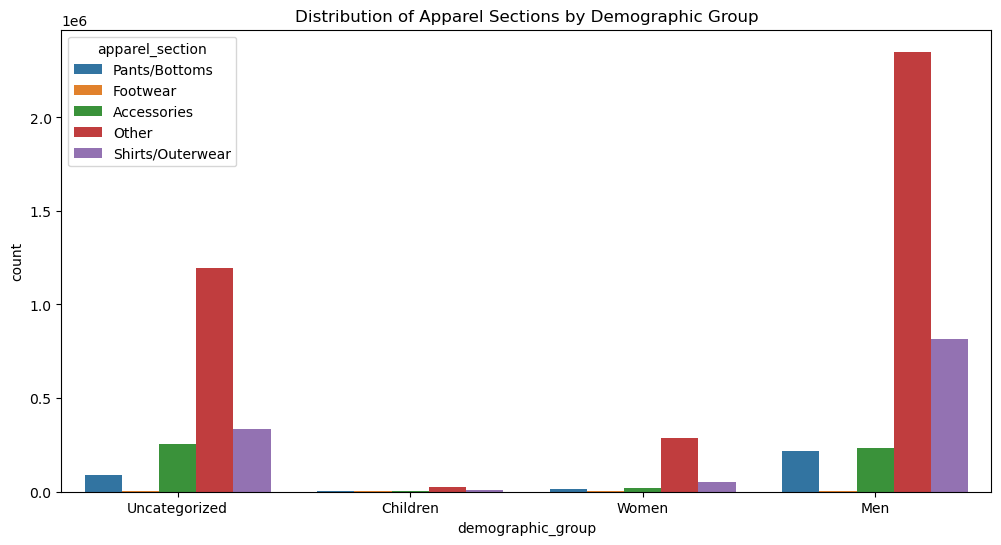

In [38]:
# Convert the grouped data to Pandas for easier plotting
apparel_df = df.groupBy("demographic_group", "apparel_section").count().toPandas()

# Plot the distribution of apparel sections by demographic group
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='demographic_group', y='count', hue='apparel_section', data=apparel_df)
plt.title('Distribution of Apparel Sections by Demographic Group')
plt.show()

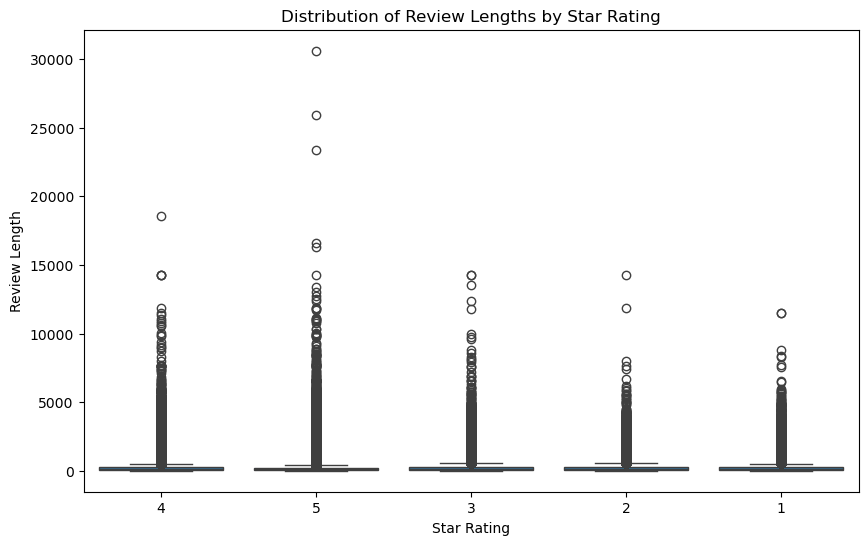

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import length, col

# Create a new column 'review_length'
df = df.withColumn("review_length", length(col("review_body")))

# Convert to Pandas for visualization
review_df = df.select("star_rating", "review_length").toPandas()

# Plot the relationship using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='star_rating', y='review_length', data=review_df)
plt.title("Distribution of Review Lengths by Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Review Length")
plt.show()

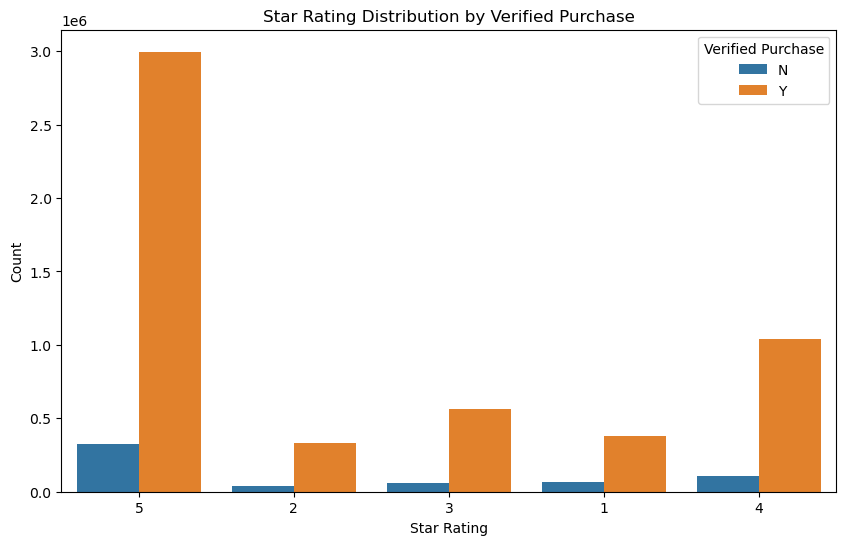

In [39]:
# Group data by star_rating and verified_purchase for visualization
verified_df = df.groupBy("star_rating", "verified_purchase").count().toPandas()

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='star_rating', y='count', hue='verified_purchase', data=verified_df)
plt.title("Star Rating Distribution by Verified Purchase")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.legend(title="Verified Purchase")
plt.show()

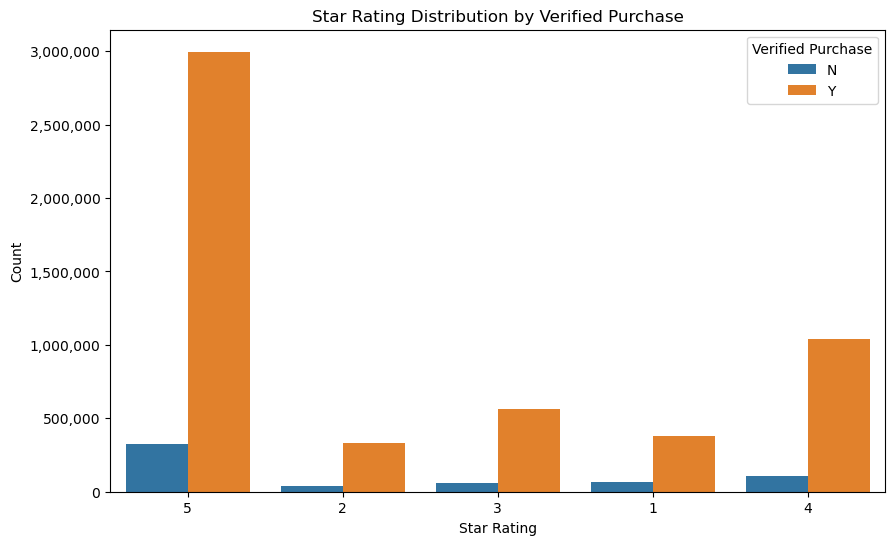

In [8]:
import matplotlib.ticker as mtick

# Group data by star_rating and verified_purchase for visualization
verified_df = df.groupBy("star_rating", "verified_purchase").count().toPandas()

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='star_rating', y='count', hue='verified_purchase', data=verified_df)
plt.title("Star Rating Distribution by Verified Purchase")
plt.xlabel("Star Rating")
plt.ylabel("Count")

# Format y-axis to show whole numbers
plt.gca().get_yaxis().set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.legend(title="Verified Purchase")
plt.show()

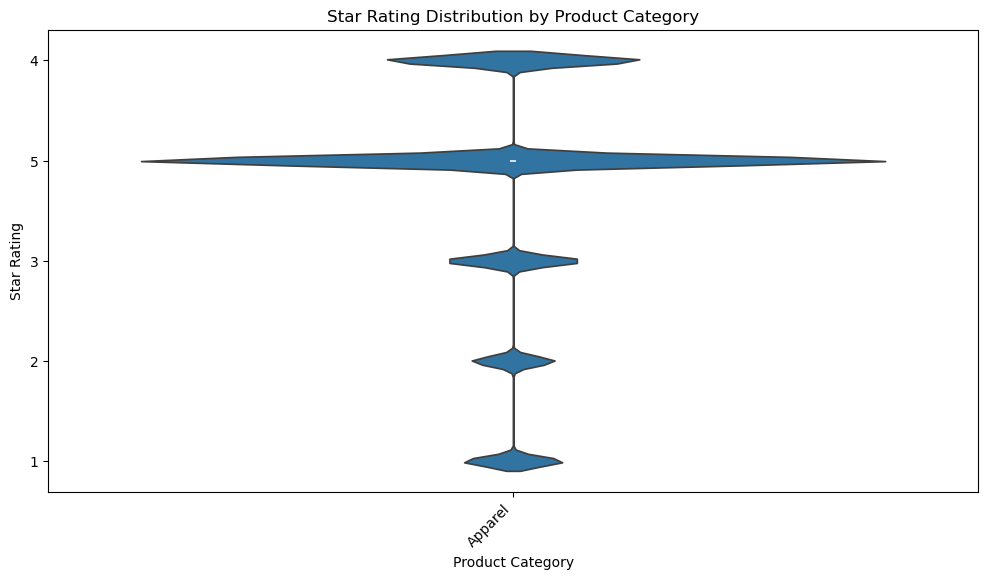

In [44]:
category_df = df.select("product_category", "star_rating").toPandas()

# Violin plot for product category vs star rating
plt.figure(figsize=(12, 6))
sns.violinplot(x="product_category", y="star_rating", data=category_df)
plt.title("Star Rating Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Star Rating")
plt.xticks(rotation=45, ha="right")
plt.show()

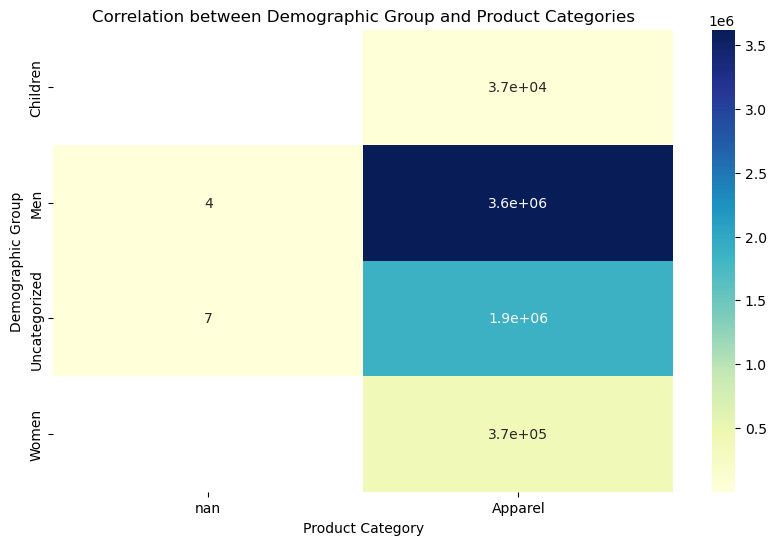

In [46]:
# Group data by demographic group and product category
demo_category_df = df.groupBy("demographic_group", "product_category").count().toPandas()

# Pivot for heatmap
demo_pivot = demo_category_df.pivot(index="demographic_group", columns="product_category", values="count")

# Heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(demo_pivot, cmap="YlGnBu", annot=True)
plt.title("Correlation between Demographic Group and Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Demographic Group")
plt.show()


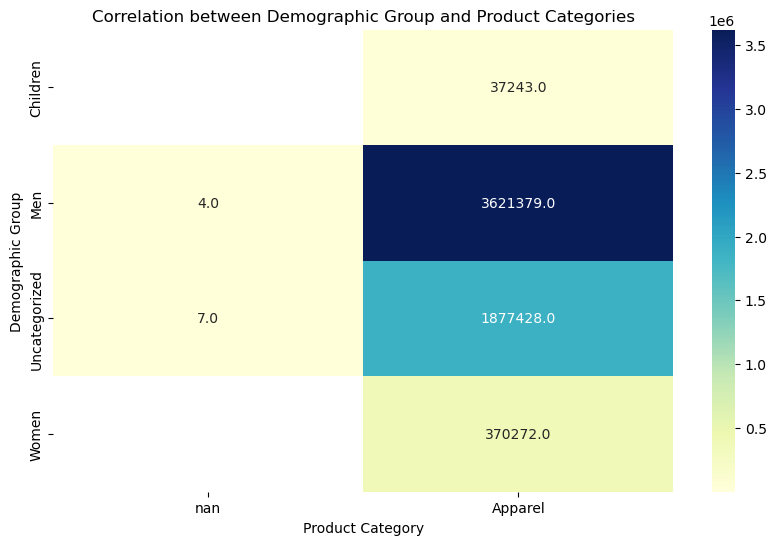

In [49]:
# Group data by demographic group and product category
demo_category_df = df.groupBy("demographic_group", "product_category").count().toPandas()

# Pivot for heatmap
demo_pivot = demo_category_df.pivot(index="demographic_group", columns="product_category", values="count")

# Heatmap visualization with float formatting
plt.figure(figsize=(10, 6))
sns.heatmap(demo_pivot, cmap="YlGnBu", annot=True, fmt=".1f", annot_kws={"size": 10})  # fmt='.1f' for one decimal place
plt.title("Correlation between Demographic Group and Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Demographic Group")
plt.show()

In [5]:
df.select("review_body", "review_id", "star_rating") \
  .withColumn("review_body", df["review_body"].substr(1, 100)) \
  .show(20, truncate=False)

+----------------------------------------------------------------------------------------------------+--------------+-----------+
|review_body                                                                                         |review_id     |star_rating|
+----------------------------------------------------------------------------------------------------+--------------+-----------+
|These Really Do Work Great, But You Do Need To Know a Few Things.  I've Been Using Mine For a Few Ye|R1KKOXHNI8MSXU|4          |
|I love this dress. Absolute favorite for winter. Heavy material. Stretchy, shows shape well. I am 5f|R26SP2OPDK4HT7|5          |
|Nice socks, great colors, just enough support for wearing with a good pair of sneakers.             |RWQEDYAX373I1 |5          |
|I bought this for my husband and WOW, this is a slick hat. High quality and craftsmanship. He said s|R231YI7R4GPF6J|5          |
|Perfect dress and the customer service was awesome!                                      

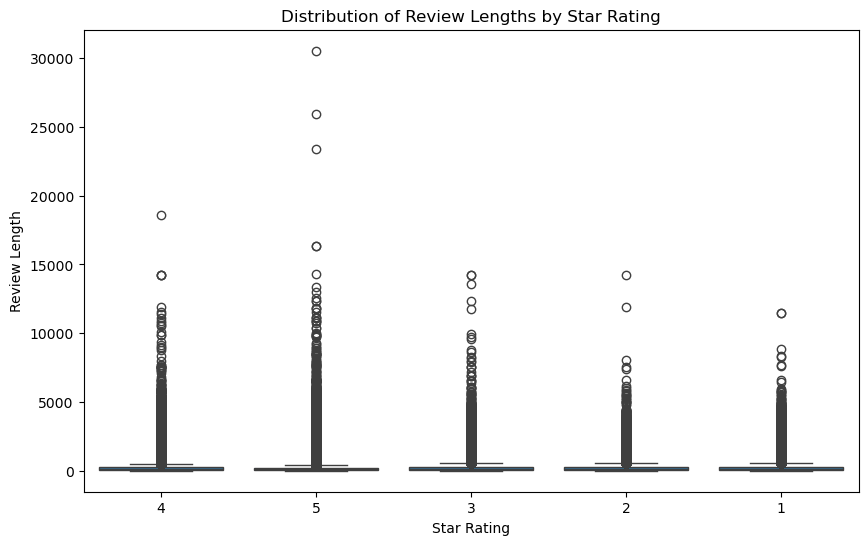

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import length, col

# Create a new column 'review_length'
df = df.withColumn("review_length", length(col("review_body")))

# Convert to Pandas for visualization
review_df = df.select("star_rating", "review_length").toPandas()

# Plot the relationship using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='star_rating', y='review_length', data=review_df)
plt.title("Distribution of Review Lengths by Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Review Length")
plt.show()
